## 심층 신경망


### 은닉층
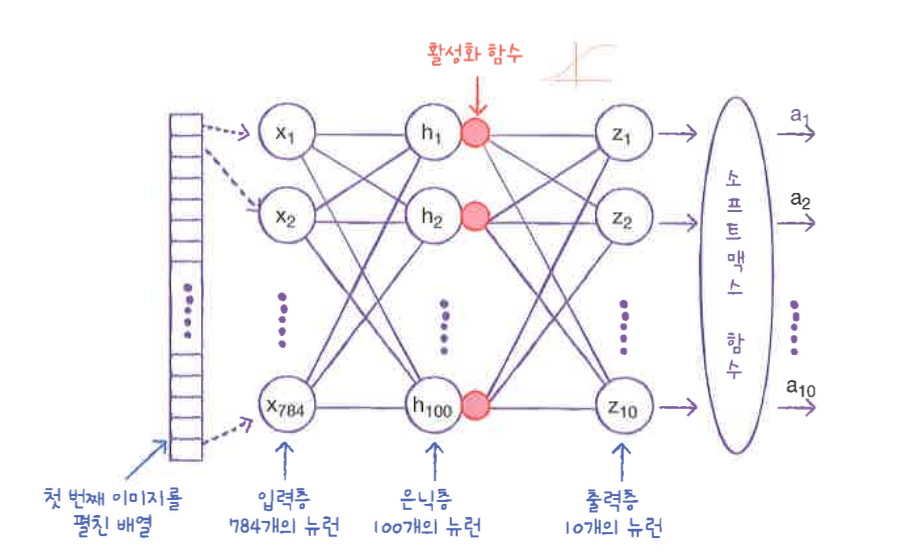

위 사진처럼 입력층과 출력층 사이에 있는 모든 층을 은닉층(hidden layer)이라고 부릅니다.

### 활성화 함수
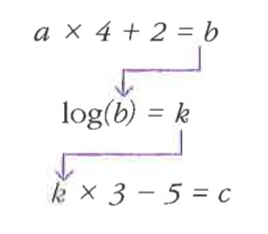

은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈입니다.

따라서 활성화 함수를 통해 비선형적으로 만든 후 다음 층으로 값을 넘겨줘야 합니다.


In [1]:
import tensorflow as tf
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)


In [3]:
#은닉층 만들기
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ))
dense2 = keras.layers.Dense(10, activation='softmax')

### 심층 신경망 만들기

In [4]:
model = keras.Sequential([dense1, dense2])

In [6]:
model.summary() #파라미터개수 확인 가능

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


케라스는 미니배치 경사 하강법을 사용합니다.

케라스의 기본 미니배치 크기는 32개입니다. 이 값은 fit() 메서드에서 batch_size 매개변수로 바꿀 수 있습니다. 

In [8]:
#층을 추가하는 다른 방법 1
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name = 'hidden'), 
                          keras.layers.Dense(10, activation='softmax', name = 'output')], name = '패션 MNIST 모델')
model.summary()


Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#층을 추가하는 다른 방법 2
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 937us/step - loss: 0.5589 - accuracy: 0.8100
Epoch 2/5
1500/1500 [==============================] - 1s 860us/step - loss: 0.4074 - accuracy: 0.8532
Epoch 3/5
1500/1500 [==============================] - 1s 857us/step - loss: 0.3723 - accuracy: 0.8650
Epoch 4/5
1500/1500 [==============================] - 1s 863us/step - loss: 0.3506 - accuracy: 0.8722
Epoch 5/5
1500/1500 [==============================] - 1s 892us/step - loss: 0.3323 - accuracy: 0.8805


### 렐루 함수(ReLu)
시그모이드 함수는 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기 때문에 학습을 어렵게 만듭니다.(기울기 소멸 문제 존재)

렐루 함수는 입력이 양수일 경우 입력을 통과시키고 음수일 경우 0으로 만듭니다.

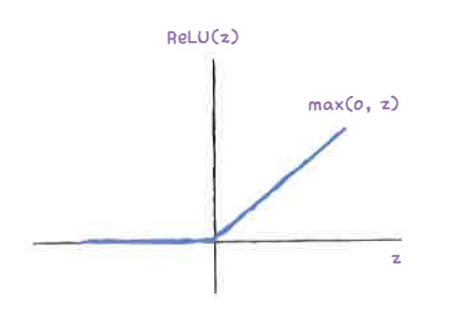

렐루 함수는 시그모이드에서 나타나는 문제를 보완하고 보다 좋은 성능을 나타냅니다.

특히 이미지 처리에서 좋은 성능을 나타낸다고 알려져 있습니다.



In [13]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # 1차원으로 펼쳐줌
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 920us/step - loss: 0.5303 - accuracy: 0.8103
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3918 - accuracy: 0.8596
Epoch 3/5
1500/1500 [==============================] - 1s 995us/step - loss: 0.3548 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 1s 941us/step - loss: 0.3337 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 1s 895us/step - loss: 0.3181 - accuracy: 0.8855


In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 548us/step - loss: 0.3574 - accuracy: 0.8753


[0.357445627450943, 0.875333309173584]

### 옵티마이저(Optimizer)
compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용합니디.

1. 아다그라드(Adagrad)

변수(가중치)의 업데이트 횟수에 따라 학습률을 조정하는 방법입니다.

아다그라드는 많이 변화하지 않는 변수들의 학습률은 크게 하고, 많이 변화하는 변수들의 학습률은 작게 합니다.

즉, 많이 변화한 변수는 최적 값에 근접했을 것이라는 가정하에 작은 크기로 이동하면서 세밀하게 값을 조정하고, 반대로 적게 변화한 변수들은 학습률을 크게 하여 빠르게 오차 값을 줄이고자 하는 방법입니다.

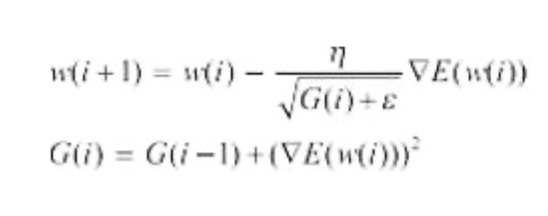

아다그라드는 기울기가 0에 수렴하는 문제가 있어 RMSprop를 대신 사용합니다.

2. 아다델타(Adadelta)

아다델타는 아다그라드에서 𝐺 값이 커짐에 따라 학습이 멈추는 문제를 해결하기 위해 등장한 방법입니다.

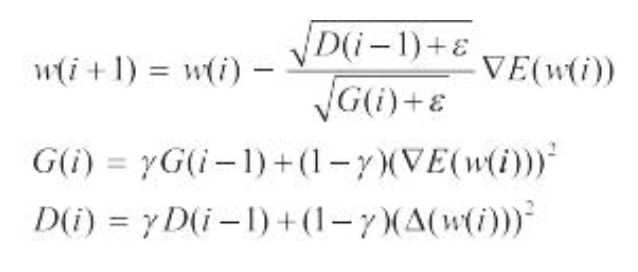

3. 알엠에스프롬(RMSprop)

알엠에스프롬은 아다그라드의 𝐺(𝑖) 값이 무한히 커지는 것을 방지하고자 제안된 방법입니다.

𝐺 값이 너무 크면 학습률이 작아져 학습이 안 될 수 있으므로 사용자가 𝛾 값을 이용하여 학습률 크기를 비율로 조정할 수 있도록 합니다.

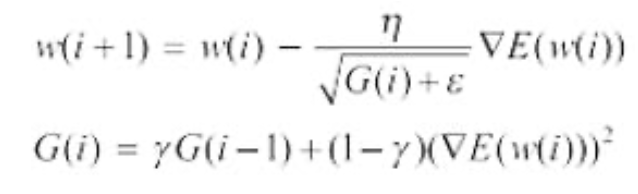

4. 모멤텀(Momentum)

경사 하강법과 마찬가지로 매번 기울기를 구하지만, 가중치를 수정하기 전에 이전 수정 방향(+,-)을 참고하여 같은 방향으로 일정한 비율만 수정하는 방법입니다.

지그재그 현상이 줄어들고, 이전 이동 값을 고려하여 일정 비율만큼 다음 값을 결정하므로 관성 효과를 얻을 수 있는 장점입니다.

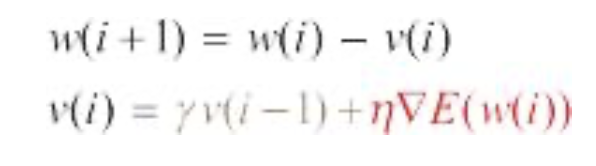

5. 네스테로프 모멤텀(NAG)

모멘텀 값과 기울기 값이 더해져 실제 값을 만드는 기존 모멘텀과 달리 모멘텀 값이 적용된 지점에서 기울기 값을 계산합니다.

모멘텀 방법은 멈추어야 할 시점에서도 관성에 의해 훨씬 멀리 갈 수 있는 단점이 있습니다. (오버 슈팅 문제)

네스테로프 방법은 모멘텀으로 절반 정도 이동한 후 어떤 방식으로 이동해야 하는지 다시 계산하여 결정하기 때문에 모멘텀 방법의 단점을 극복할 수 있습니다.

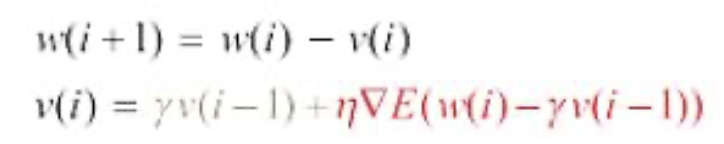

6. 아담(Adam)

모멘텀과 알엠에스프롬의 장점을 결합하여 만든 방법입니다.

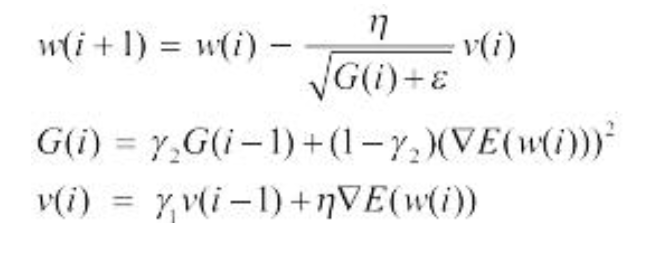

In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)


Epoch 1/5
1500/1500 [==============================] - 1s 848us/step - loss: 0.5289 - accuracy: 0.8152
Epoch 2/5
1500/1500 [==============================] - 1s 776us/step - loss: 0.3965 - accuracy: 0.8584
Epoch 3/5
1500/1500 [==============================] - 1s 802us/step - loss: 0.3558 - accuracy: 0.8706
Epoch 4/5
1500/1500 [==============================] - 1s 786us/step - loss: 0.3285 - accuracy: 0.8803
Epoch 5/5
1500/1500 [==============================] - 1s 814us/step - loss: 0.3088 - accuracy: 0.8872
